In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.utils import to_categorical
%matplotlib inline
print('Librairies imported')

Importing librairies...


Using TensorFlow backend.


Librairies imported


In [4]:
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
tf.logging.set_verbosity(tf.logging.ERROR)

In [41]:
df_1D = pd.read_csv('20190603 data_1D prepared.csv')
df_1D = df_1D.iloc[:,1:]
df_1D = df_1D.dropna()
df_1D.reset_index(inplace=True,drop=True)

In [42]:
df_1D.isnull().sum().sum()

0

In [43]:
df_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 21 columns):
Date                  1207 non-null int64
Varop_Spy             1207 non-null float64
Varhl_spy             1207 non-null float64
RSI                   1207 non-null float64
75 - RSI              1207 non-null float64
RSI - 25              1207 non-null float64
BBD_Delta_Up          1207 non-null float64
delta5_8              1207 non-null float64
delta8_10             1207 non-null float64
delta10_12            1207 non-null float64
delta12_15            1207 non-null float64
delta15_30            1207 non-null float64
delta30_35            1207 non-null float64
delta35_40            1207 non-null float64
delta40_45            1207 non-null float64
delta45_50            1207 non-null float64
delta_tsf             1207 non-null float64
Forcast Oscillator    1207 non-null float64
target_up             1207 non-null int64
target_down           1207 non-null int64
target_value       

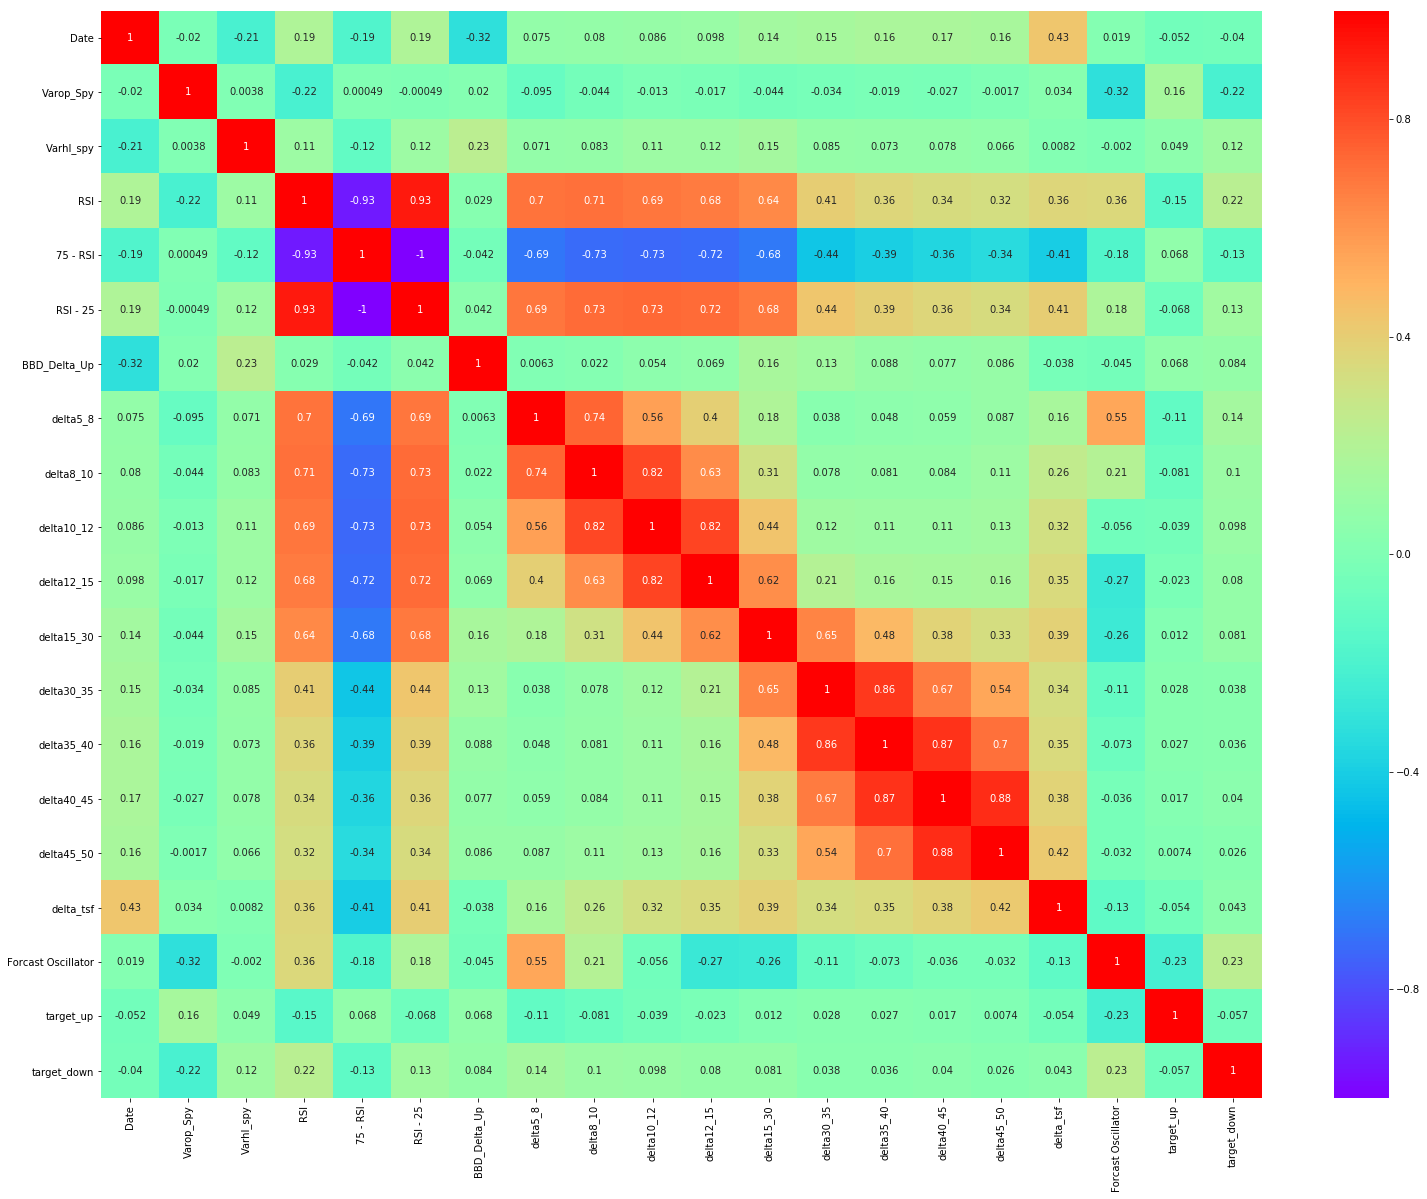

In [44]:
plt.figure(figsize=(26,20))
sns.heatmap(df_1D.iloc[:,:-1].corr(),annot=True,cmap='rainbow')
plt.show()

In [45]:
df_1D.shape

(1207, 21)

In [46]:
df_1D['target_up'].sum(),df_1D['target_down'].sum()

(65, 65)

In [47]:
delta = round(df_1D.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,' periods (',df_1D.iloc[bloc1,0],')\nBloc 2 :',bloc2,' periods (',df_1D.iloc[bloc2,0],')')
print('First period :',df_1D.iloc[0,0])
print('Last period :',df_1D.iloc[df_1D.shape[0]-1,0])


# of periods :  1207
On 80% - 20% slash : 
Bloc 1 :  966  periods ( 20180618 )
Bloc 2 : 241  periods ( 20150731 )
First period : 20140815
Last period : 20190603


In [48]:
X = df_1D.iloc[:,1:-3]
y_up = df_1D.iloc[:,-3].values
y_down = df_1D.iloc[:,-2].values

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 17 columns):
Varop_Spy             1207 non-null float64
Varhl_spy             1207 non-null float64
RSI                   1207 non-null float64
75 - RSI              1207 non-null float64
RSI - 25              1207 non-null float64
BBD_Delta_Up          1207 non-null float64
delta5_8              1207 non-null float64
delta8_10             1207 non-null float64
delta10_12            1207 non-null float64
delta12_15            1207 non-null float64
delta15_30            1207 non-null float64
delta30_35            1207 non-null float64
delta35_40            1207 non-null float64
delta40_45            1207 non-null float64
delta45_50            1207 non-null float64
delta_tsf             1207 non-null float64
Forcast Oscillator    1207 non-null float64
dtypes: float64(17)
memory usage: 160.4 KB


In [54]:
Xtrain = X.iloc[:bloc1,:]
Xtest = X.iloc[bloc1:,:]
ytrain_up = y_up[:bloc1]
ytest_up = y_up[bloc1:]
ytrain_down = y_down[:bloc1]
ytest_down = y_down[bloc1:]

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)
#y_up = scaler.fit_transform(np.array(y_up).reshape(-1,1))
#y_down = scaler.fit_transform(np.array(y_down).reshape(-1,1))
y_up = np.array(y_up).reshape(-1,1)
y_down = np.array(y_down).reshape(-1,1)

In [59]:
Xtrain.shape,ytrain_up.shape,ytrain_down.shape,ytest_down.shape,ytest_up.shape

((966, 17), (966,), (966,), (241,), (241,))

In [60]:
# fix random seed for reproducibility
seed = 770
np.random.seed(seed)

In [72]:
ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

model_up = Sequential()
# Add an input layer 
model_up.add(Dense(50, activation='relu'))
# Add one hidden layer 
model_up.add(Dense(50, activation='relu'))
# Add an output layer 
model_up.add(Dense(1, activation='sigmoid'))

model_down = Sequential()
# Add an input layer 
model_down.add(Dense(50, activation='relu'))
# Add one hidden layer 
model_down.add(Dense(50, activation='relu'))
# Add an output layer 
model_down.add(Dense(1, activation='sigmoid'))

In [73]:
print('Processing move_up')
model_up.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_up = model_up.fit(Xtrain, ytrain_up,epochs=30, batch_size=64, verbose=0)

print('Processing move_down')
model_down.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_down = model_down.fit(Xtrain, ytrain_down,epochs=30, batch_size=64, verbose=0)

print('Computing done')

Processing move_up
Processing move_down
Computing done


In [74]:
train_acc_up = model_up.evaluate(Xtrain, ytrain_up,verbose=1)
train_acc_down = model_down.evaluate(Xtrain, ytrain_down,verbose=1)
train_acc_up,train_acc_down

966/966 [==============================] - 0s 179us/step


([0.1884520314016821, 0.9420289855072463, 0.05097858686439739],
 [0.1753263814918558, 0.9420289855072463, 0.04843802541900739])

In [75]:
yhat_up = model_up.predict_classes(Xtest)
yhat_down = model_down.predict_classes(Xtest)

In [76]:
score_up = model_up.evaluate(Xtest, ytest_up,verbose=1)
score_down = model_down.evaluate(Xtest, ytest_down,verbose=1)
score_up,score_down

241/241 [==============================] - 0s 22us/step


([0.13091305281611398, 0.9626556019070732, 0.0324312320048631],
 [0.16725714770590122, 0.9585062245610344, 0.040524496329770544])

In [77]:
confusion_matrix(ytest_up, yhat_up),

(array([[232,   0],
        [  9,   0]]),)

In [78]:
confusion_matrix(ytest_down, yhat_down)

array([[231,   1],
       [  9,   0]])

In [79]:
predict_up = model_up.predict(Xtest)
predict_down = model_down.predict(Xtest)

In [69]:

accuracy_up = accuracy_score(ytest_up, yhat_up)
accuracy_down = accuracy_score(ytest_down, yhat_down)

# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents : vrais_positifs/(vrais_positifs+faux_positifs)
precision_up = precision_score(ytest_up, yhat_up)  
precision_down = precision_score(ytest_down, yhat_down) 


# Recall : (vrai_positifs/(vrais_positifs+faux_négatifs))
recall_up = recall_score(ytest_up, yhat_up) 
recall_down = recall_score(ytest_down, yhat_down) 


roc_up=roc_auc_score(ytest_up,yhat_up)
roc_down=roc_auc_score(ytest_down,yhat_down)

In [70]:
print('RESULTATS UP\n')
print('Accuracy: %.2f%%' % (accuracy_up * 100.0))
print("Precision: %.2f%% " % (precision_up *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_up * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("ROC: %.2f%% " % (roc_up *100))
# get probabilities for positive class

print(classification_report(ytest_up, yhat_up))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_up, yhat_up))
print('Matrice de confusion :')
conf_matrix

RESULTATS UP

Accuracy: 95.85%
Precision: 0.00%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 0.00%   => Positifs trouvés par Golem sur tous les positifs existants
ROC: 49.78% 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       232
           1       0.00      0.00      0.00         9

   micro avg       0.96      0.96      0.96       241
   macro avg       0.48      0.50      0.49       241
weighted avg       0.93      0.96      0.94       241

[[231   1]
 [  9   0]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [71]:
print('RESULTATS DOWN\n')
print('Accuracy: %.2f%%' % (accuracy_down * 100.0))
print("Precision: %.2f%% " % (precision_down *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_down * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("ROC: %.2f%% " % (roc_down *100))
# get probabilities for positive class

print(classification_report(ytest_down, yhat_down))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_down, yhat_down))
print('Matrice de confusion :')
conf_matrix

RESULTATS DOWN

Accuracy: 92.95%
Precision: 16.67%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 22.22%   => Positifs trouvés par Golem sur tous les positifs existants
ROC: 58.96% 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       232
           1       0.17      0.22      0.19         9

   micro avg       0.93      0.93      0.93       241
   macro avg       0.57      0.59      0.58       241
weighted avg       0.94      0.93      0.93       241

[[222  10]
 [  7   2]]
Matrice de confusion :


,Vrais_estimés,Faux_estimés
vrais_réels,Vrais_positifs,Faux_négatif
Faux_réels,Faux_positifs,Vrais-négatifs


In [31]:
len(df_1D)-(len(df_1D)-241)

241

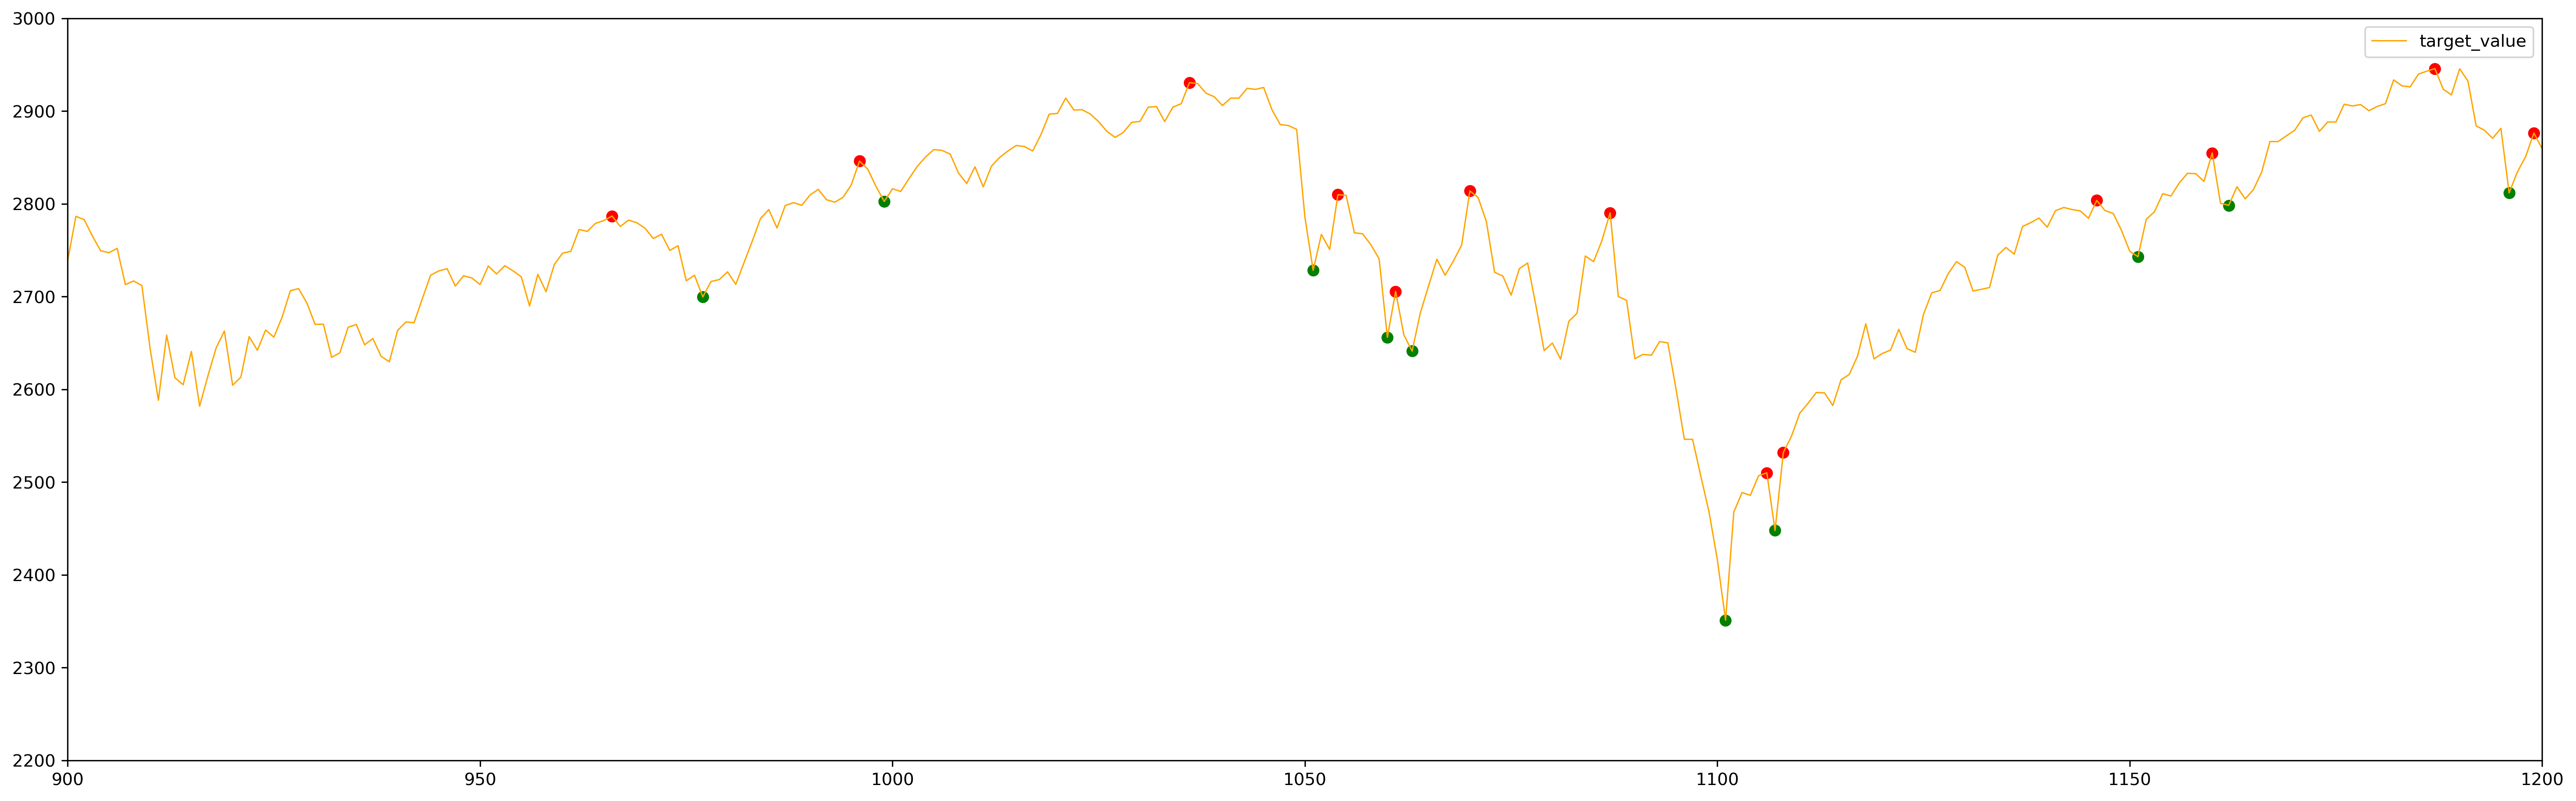

In [32]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(df_1D['target_value'],color='orange',lw=0.8)
plt.xlim(900,1200)
plt.ylim(2200,3000)
a = -1
for i in range(len(df_1D)-241,len(df_1D)):
    a+=1
    if yhat_up[a] == 1:
        plt.scatter(x=df_1D.index[i],y=df_1D.iloc[i,-1],c='g',marker='o')
    elif yhat_down[a] == 1:
        plt.scatter(x=df_1D.index[i],y=df_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [33]:
sum(yhat_up),sum(yhat_down)

(array([11], dtype=int32), array([13], dtype=int32))

In [34]:
# save the model to disk
filename = 'finalized_model_long.sav'
pickle.dump(model_up, open(filename, 'wb'))
filename = 'finalized_model_short.sav'
pickle.dump(model_down, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)